In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [2]:
df     = pd.read_csv("data/lyrical_genius.csv")

df = df[((df["Genre"] == "pop") | (df["Genre"] ==  "country"))]
df = df.drop(columns="Unnamed: 0")
df = df.drop_duplicates(subset=["Name","Artist"],keep=False)

genres = df["Genre"].unique()
unique_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080'
]
colors = {}
i = 0
for genre in genres:
    colors[genre] = unique_colors[i]
    i+=1
colors_list = [colors[genre] for genre in genres]
df.head()

,Unnamed: 0.1,Genre,Id,Popularity,Is_Exp,Name,Artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature,Lyrics
732,982,country,6ERR6e7h6wCqGoz1TjiUJb,70,False,Knockin' Boots,Luke Bryan,0.739,0.682,2,-3.728,1,0.2050,0.1290,0.0,0.328,0.634,131.983,4,This truck needs a half tank These wheels nee...
733,984,country,7C6JnGZRj0HMIF06rlz9Mb,75,False,Make It Sweet,Old Dominion,0.539,0.859,7,-4.465,1,0.0399,0.0317,0.0,0.102,0.456,89.937,4,"I know it's a drag, I know it's a grind I kno..."
734,986,country,0bPnT6i9H1p8Vd85GS6Z7I,78,False,Night Shift,Jon Pardi,0.628,0.757,7,-3.561,1,0.0281,0.1130,0.0,0.263,0.727,96.016,4,It's been a wreck me week Sixty plus from daw...
735,987,country,0ME4uQYTQmovH1v9PbWqW2,73,False,Lead Me On,Teddy Robb,0.464,0.688,8,-4.553,1,0.0301,0.1060,0.0,0.146,0.411,173.793,4,If you wanna show up where I'm drinking...
736,988,country,698eQRku24PIYPQPHItKlA,80,False,She Got the Best of Me,Luke Combs,0.533,0.907,11,-3.793,1,0.0406,0.0292,0.0,0.386,0.700,150.990,4,"Seventeen, you don't think that much about li..."


In [3]:
df["Genre"].value_counts()

pop        1599
country     898
Name: Genre, dtype: int64

In [4]:
x_cols    = ["Is_Exp","Danceability","Energy","Key","Loudness","Mode","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo","Time_Signature"]
y_cols    = ["Genre"]
meta_cols = ["Id","Popularity","Name","Artist"]

In [5]:
X,y,meta = df[x_cols],df[y_cols].iloc[:,0],df[meta_cols]

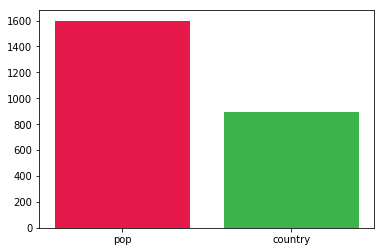

In [6]:
hist_data = dict(y.value_counts())
keys = list(hist_data.keys())
vals = list(hist_data.values())
plt.bar(keys,vals ,color=colors_list)
plt.show()

In [7]:
# plt.pie(vals,labels=keys ,colors=colors_list)
# plt.show()

In [8]:
X.describe()

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,0.618942,0.588086,5.276332,-7.759653,0.723668,0.067868,0.327603,0.024650,0.173230,0.537530,118.904902,3.945935
std,0.135008,0.205592,3.536629,3.337551,0.447272,0.070793,0.297623,0.116559,0.131898,0.233628,28.849102,0.288468
min,0.142000,0.021000,0.000000,-24.385000,0.000000,0.022800,0.000003,0.000000,0.021900,0.037600,37.399000,1.000000
25%,0.534000,0.438000,2.000000,-9.651000,0.000000,0.032900,0.058900,0.000000,0.095300,0.355000,97.038000,4.000000
50%,0.624000,0.602000,5.000000,-7.072000,1.000000,0.042300,0.227000,0.000002,0.122000,0.529000,115.172000,4.000000
75%,0.709000,0.754000,8.000000,-5.301000,1.000000,0.067400,0.565000,0.000193,0.204000,0.721000,136.746000,4.000000
max,0.966000,0.993000,11.000000,0.366000,1.000000,0.830000,0.995000,0.959000,0.946000,0.982000,213.840000,5.000000


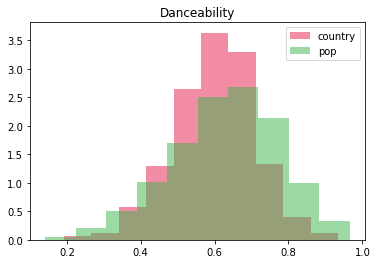

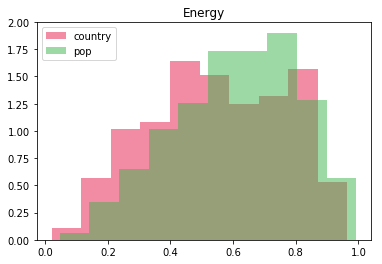

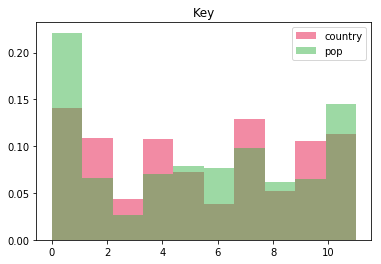

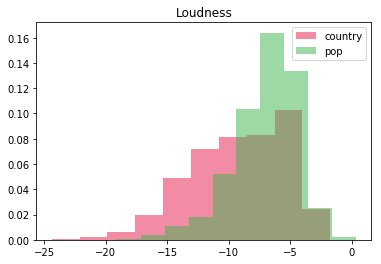

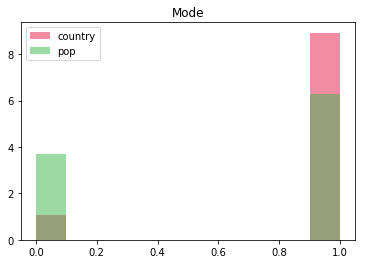

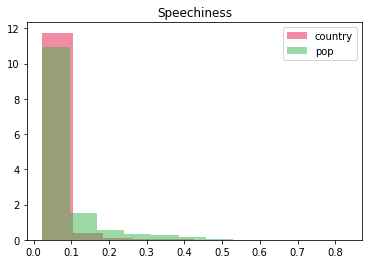

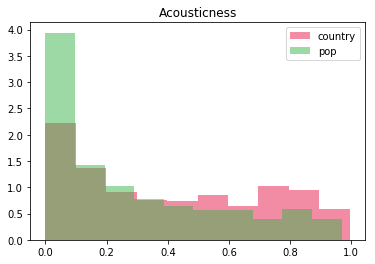

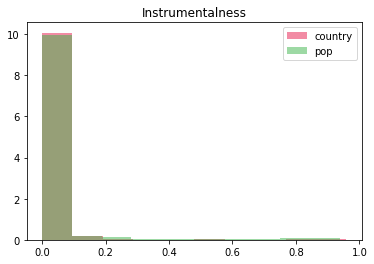

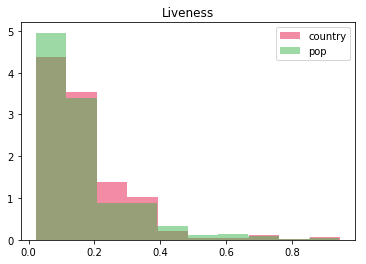

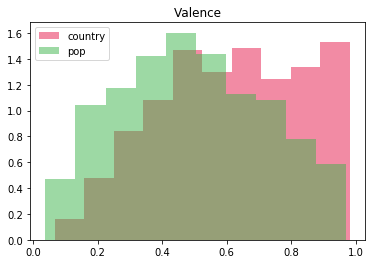

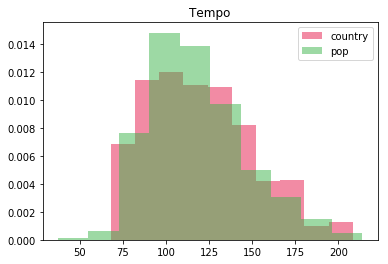

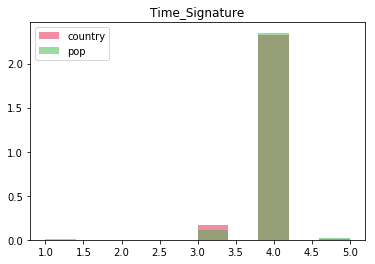

In [9]:
for label, content in X.iteritems():
    if label != "Is_Exp":
        for genre in genres:
            plt.hist(content[df["Genre"] == genre],label=genre,color=colors[genre],density=1,alpha=.5)
            plt.title(label)
        plt.legend()
        plt.show()

In [10]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(scaled_X)
prin_df   = pd.DataFrame(data=prin_comp, columns=["PC1","PC2"])

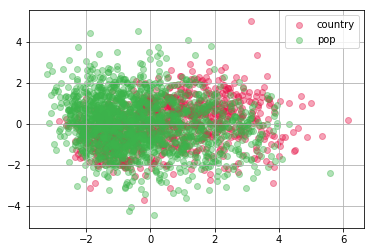

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)


for genre, color in zip(genres, colors_list):
    mask = list(df["Genre"] == genre)
    xs   = prin_df["PC1"][mask]
    ys   = prin_df["PC2"][mask]
    ax.scatter(xs,ys, c=color,alpha=.4)

ax.legend(genres)
ax.grid()
plt.savefig("brit_cool.png")

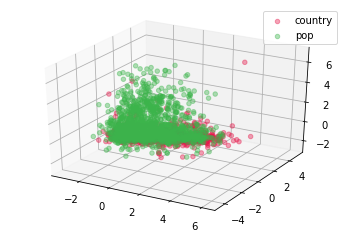

In [12]:
pca = PCA(n_components=3)
prin_comp = pca.fit_transform(scaled_X)
prin_df   = pd.DataFrame(data=prin_comp, columns=["PC1","PC2","PC3"])

# %matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for genre, color in zip(genres, colors_list):
    mask = list(df["Genre"] == genre)
    ax.scatter(prin_df["PC1"][mask], prin_df["PC2"][mask], prin_df["PC3"][mask], c=color,alpha=.4)

    
ax.legend(genres)
ax.grid()

In [13]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, test_size=.2, random_state=1234, stratify=y)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression(solver="lbfgs", multi_class="ovr")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
training = clf.score(X_train, y_train)
testing  = clf.score(X_test,  y_test)
print("Training Accuracy: {}".format(training))
print("Testing  Accuracy: {}".format(testing))

Training Accuracy: 0.7796695042563846
Testing  Accuracy: 0.754


In [17]:
from sklearn.neighbors import KNeighborsClassifier

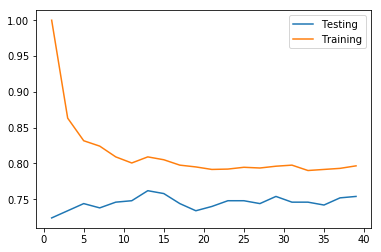

In [18]:
ns = []
test_scores = []
train_scores = []
for n in range(1,40,2):
    classifier = KNeighborsClassifier(n_neighbors=n)  
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test)  
    training = classifier.score(X_train, y_train)
    testing  = classifier.score(X_test,  y_test)
    
    ns.append(n)
    test_scores.append(testing)
    train_scores.append(training)
plt.plot(ns,test_scores,label="Testing")
plt.plot(ns, train_scores,label="Training")
plt.legend()
plt.show()

The best k for KNN seems to be when $k=11$ as both the training and testing accuracies reach a monotonic state here.

In [19]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn import tree

In [25]:
def cv_performance(clf, X, y, kf, metrics=["accuracy"]) :
    """
    Splits the data, X and y, into k-folds and runs k-fold cross-validation.
    Trains classifier on k-1 folds and tests on the remaining fold.
    Calculates the k-fold cross-validation accuracy for classifier
    by averaging the performance across folds.
    
    Adapted for HW6
    """
    y=np.array(y.tolist())
    k = kf.get_n_splits(X, y)
    m = len(metrics)
    scores = np.empty((m, k))
    m=0
    for k, (train, test) in enumerate(kf.split(X, y)) :
        X_train = X[train]
        X_test = X[test]
        y_train = y[train]
        y_test = y[test]
        clf.fit(X_train, y_train)
        # use Decision_tree_classifier.predict to make predictions
        y_pred = clf.predict(X_test)
        score = clf.score(X_test, y_test)
        scores[m,k] = score
            
    return scores.mean(axis=1) # average across columns

In [26]:
def select_params(X, y, kf, metrics=["accuracy"]) :
    """
    Sweeps different settings for the hyperparameters of a Decision Tree classifier,
    calculating the k-fold CV performance for each setting and metric,
    then selects the hyperparameters that maximize the average performance for each metric.
    
    Adapted from HW6
    """

    # part 4b: for each metric, select optimal hyperparameters using cross-validation
    
    # create grid of hyperparameters
    # hint: use a small 2x2 grid of hyperparameters for debugging
    depth_range = range(5,21)
    min_samples_range = range(1,15)
    scores = np.empty((len(metrics), len(depth_range), len(min_samples_range)))

    # compute CV scores using cv_performance(...)
    for depth_ind, max_depth in enumerate(depth_range):
        for samples_ind, min_samples in enumerate(min_samples_range):
            clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, min_samples_leaf=min_samples) 
            # compute CV scores using cv_performance(...)
            score = cv_performance(clf, X, y, kf, metrics)
            scores[:,depth_ind,samples_ind] = score
    
    # get best hyperparameters
    best_params = []
    for met_ind, metric in enumerate(scores):
        print (metrics[met_ind])
        print ("maximum score is", metric.max())
        depth_ind, samples_ind = np.unravel_index(metric.argmax(), metric.shape)
        params = (depth_range[depth_ind], min_samples_range[samples_ind])
        print( "max_depth, min_samples=", params)
        best_params.append(params)
    
    return best_params

In [27]:
# optimize parameters with cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
opt_max_depth, opt_min_samples = select_params(X_train, y_train, skf)[0]

accuracy
maximum score is 0.7731497651163083
max_depth, min_samples= (5, 9)


In [28]:
# train classifier
DTree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=opt_max_depth, min_samples_leaf=opt_min_samples)
DTree.fit(X_train,y_train)

# predict genres of test data
accuracy = DTree.score(X_test,y_test)

print("Test accuracy of the DTree is")
print(accuracy)
print("=============================")

Test accuracy of the DTree is
0.756


In [29]:
from sklearn.dummy import DummyClassifier

In [30]:
# compare to stratified dummy classifier
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train,y_train)
dummy_accuracy = dummy.score(X_test,y_test)
print( "Dummy classifier accuracy is" )
print(dummy_accuracy)

Dummy classifier accuracy is
0.5
